In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime 
import os
import sys
import time

%matplotlib inline

In [19]:
BASE_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
DOWNLOAD_DIR = 'COVID-19/'
CONFIRMED_PATH = 'time_series_covid19_confirmed_global.csv'
RECOVERED_PATH = 'time_series_covid19_recovered_global.csv'
DEATHS_PATH = 'time_series_covid19_deaths_global.csv'

In [20]:
if not os.path.isdir('COVID-19'):
    os.mkdir('COVID-19')

In [21]:
!wget -L $BASE_URL$CONFIRMED_URL -O $DOWNLOAD_DIR$CONFIRMED_URL
!wget -L $BASE_URL$RECOVERED_URL -O $DOWNLOAD_DIR$RECOVERED_URL
!wget -L $BASE_URL$DEATHS_URL -O $DOWNLOAD_DIR$DEATHS_URL

--2020-05-01 10:45:43--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87580 (86K) [text/plain]
Saving to: ‘COVID-19/time_series_covid19_confirmed_global.csv’

COVID-19/time_serie 100%[===================>]  85.53K   143KB/s    in 0.6s    

2020-05-01 10:45:44 (143 KB/s) - ‘COVID-19/time_series_covid19_confirmed_global.csv’ saved [87580/87580]

--2020-05-01 10:45:44--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Connecting to raw.githubusercontent.com (raw.git

In [22]:
confirmed_df = pd.read_csv(os.path.join(DOWNLOAD_DIR, CONFIRMED_PATH))
deaths_df = pd.read_csv(os.path.join(DOWNLOAD_DIR, DEATHS_PATH))
recovered_df = pd.read_csv(os.path.join(DOWNLOAD_DIR, RECOVERED_PATH))

In [23]:
confirmed_df.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006


In [24]:
deaths_df.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450


In [25]:
recovered_df.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,150,166,179,188,188,207,220,228,252,260
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,345,356,385,394,403,410,422,431,455,470
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1152,1204,1355,1408,1479,1508,1558,1651,1702,1779


In [26]:
confirmed_trials = confirmed_df.copy()
confirmed_trials.shape

(266, 104)

In [27]:
drop_columns = confirmed_trials.columns.values[4:]
new_rows = []

for index, row in confirmed_trials.iterrows():
    for i, ind in enumerate(row.index[4:]):       
        my_dict = {}
        my_dict['Province/State'] = row['Province/State']
        my_dict['Country/Region'] = row['Country/Region']
        my_dict['Lat'] = row['Lat']
        my_dict['Long'] = row['Long']
        my_dict['Date'] = datetime.strptime(ind, '%m/%d/%y')
        my_dict['ConfirmedCases'] = row.iloc[i+4]
        my_dict['Fatalities'] = deaths_df[deaths_df['Country/Region'] == row['Country/Region']].iloc[0, i+4]
        my_dict['Recovered'] = recovered_df[recovered_df['Country/Region'] == row['Country/Region']].iloc[0, i+4]
        new_rows.append(my_dict)
        
confirmed_global_df = pd.DataFrame(new_rows)

In [28]:
confirmed_global_df[confirmed_global_df['Country/Region'] == 'Italy']

,ConfirmedCases,Country/Region,Date,Fatalities,Lat,Long,Province/State,Recovered
13700,0,Italy,2020-01-22,0,43.0,12.0,NaN,0
13701,0,Italy,2020-01-23,0,43.0,12.0,NaN,0
13702,0,Italy,2020-01-24,0,43.0,12.0,NaN,0
13703,0,Italy,2020-01-25,0,43.0,12.0,NaN,0
13704,0,Italy,2020-01-26,0,43.0,12.0,NaN,0
13705,0,Italy,2020-01-27,0,43.0,12.0,NaN,0
13706,0,Italy,2020-01-28,0,43.0,12.0,NaN,0
13707,0,Italy,2020-01-29,0,43.0,12.0,NaN,0
13708,0,Italy,2020-01-30,0,43.0,12.0,NaN,0
13709,2,Italy,2020-01-31,0,43.0,12.0,NaN,0


In [29]:
confirmed_global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26600 entries, 0 to 26599
Data columns (total 8 columns):
ConfirmedCases    26600 non-null int64
Country/Region    26600 non-null object
Date              26600 non-null datetime64[ns]
Fatalities        26600 non-null int64
Lat               26600 non-null float64
Long              26600 non-null float64
Province/State    8200 non-null object
Recovered         26600 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1.6+ MB


In [30]:
def data_per_country(country, df):
    df_progress = df[df['Country/Region'] == country].loc[:, ["Date", "ConfirmedCases", "Fatalities"]].groupby(['Date'], as_index=False).sum()    
    if len(df_progress) != 0:
        return df_progress
    else:        
        return None
    
def plot_progress_data(countries_list, dataframe, data_to_show='confirmed'):
    plot_list = []
    
    data_type_string = "ConfirmedCases" if data_to_show is 'confirmed' else 'Fatalities'
    
    for country in countries_list:
        df = data_per_country(country, dataframe)
        if df is None:
            continue
        df = df.loc[:, ['Date', data_type_string]]        
        plt.plot(df.iloc[-35:,0], df.iloc[-35:,1])
    
    plt.xlabel("Date")
    plt.ylabel("Confirmed cases")
    plt.title("Covid-19 progression")
    plt.grid(True)
    plt.legend(countries)
    _ = plt.xticks(rotation=270, fontsize = 10)

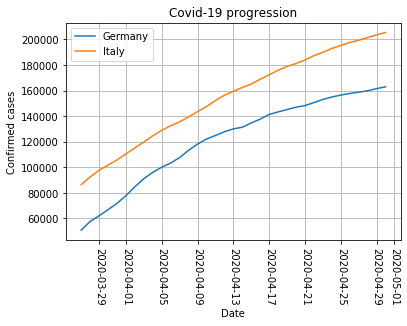

In [41]:
# Now let's see how the confirmed cases curves changed in time
import numpy as np

countries = ['Germany', 'Italy']
plot_progress_data(countries, confirmed_global_df, 'confirmed')

# Cases per day with barplots

In [32]:
# Insert the country of your interest
per_day_country = 'Italy'

In [33]:
confirmed_country = confirmed_global_df[confirmed_global_df['Country/Region'] == per_day_country]
data_per_day_country = []

for i, (_, row) in enumerate(confirmed_country.iterrows()):
    my_dict = {}
    my_dict['Date'] = row['Date']    
    
    # If this is the first day, just get its data
    if i == 0:           
        my_dict['ConfirmedCases'] = row['ConfirmedCases']
        my_dict['Fatalities'] = row['Fatalities']        
    else:
        data_day_before = confirmed_country.iloc[i-1]    
        my_dict['ConfirmedCases'] = row['ConfirmedCases'] - data_day_before['ConfirmedCases']
        my_dict['Fatalities'] = row['Fatalities'] - data_day_before['Fatalities']        
    data_per_day_country.append(my_dict)
    
df_day_by_day = pd.DataFrame(data_per_day_country)

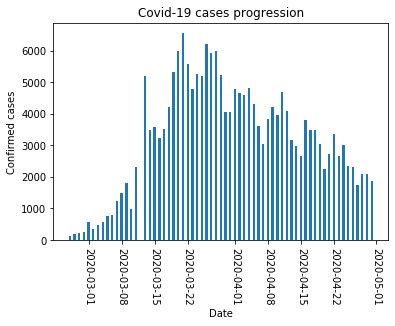

In [37]:
plt.xlabel("Date")
plt.ylabel("Confirmed cases")
plt.title("Covid-19 cases progression")
_ = plt.xticks(rotation=270, fontsize = 10)
_ = plt.bar(df_day_by_day.loc[35:, 'Date'], df_day_by_day.loc[35:, 'ConfirmedCases'], width=0.5)

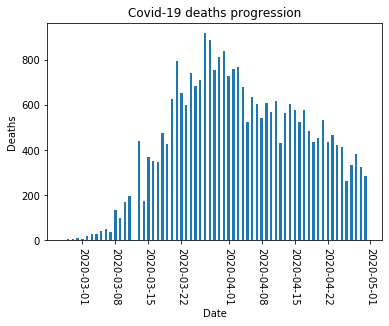

In [38]:
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.title("Covid-19 deaths progression")
_ = plt.xticks(rotation=270, fontsize = 10)
_ = plt.bar(df_day_by_day.loc[35:, 'Date'], df_day_by_day.loc[35:, 'Fatalities'], width=0.5)